# IPL Score Prediction using Deep Learning

In the fast-paced world of IPL, where every run and decision can change the outcome of a match, predicting scores in real time has become both exciting and valuable. Deep learning, with its ability to process massive amounts of historical and live match data, is revolutionizing the way fans, analysts and even teams anticipate results. By uncovering complex patterns that humans or traditional methods might miss, deep learning offers highly accurate score forecasts, making it a powerful tool for enhancing the thrill and strategy of the game.

Now lets implement it step by step:

### 1. Installing Libraries

We are importing all necessary Python libraries such as [NumPy](https://www.geeksforgeeks.org/numpy/python-numpy/), [Pandas](https://www.geeksforgeeks.org/pandas/pandas-tutorial/), [Scikit-learn](https://www.geeksforgeeks.org/machine-learning/learning-model-building-scikit-learn-python-machine-learning-library/), [Matplotlib](https://www.geeksforgeeks.org/python/python-introduction-matplotlib/), [Keras](https://www.geeksforgeeks.org/deep-learning/what-is-keras/) and [Seaborn](https://www.geeksforgeeks.org/python/python-seaborn-tutorial/) required for data handling, visualization, preprocessing and building deep learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

### Load the Dataset

In [2]:
ipl = pd.read_csv("ipl_data.csv")
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Data Pre-Processing

Dropping unimportant features

In [3]:
# Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'mid', 'striker', 'non-striker'], axis=1)

Ferther Pre-Processing

In [4]:
x = df.drop(['total'], axis=1)
y = df['total']

Label Encoding

In [5]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transfrom the categorical features with label encoding
x['venue'] = venue_encoder.fit_transform(x['venue'])
x['bat_team'] = batting_team_encoder.fit_transform(x['bat_team'])
x['bowl_team'] = bowling_team_encoder.fit_transform(x['bowl_team'])
x['batsman'] = striker_encoder.fit_transform(x['batsman'])
x['bowler'] = bowler_encoder.fit_transform(x['bowler'])


Train Test Split

In [6]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transfrom both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Define the Neural Network

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)), # input layer 
    keras.layers.Dense(512, activation='relu'), # hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression 
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression

Model Training

In [9]:
# Train the model
model.fit(x_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 31.9717 - val_loss: 22.0575
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.3461 - val_loss: 21.9485
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.2957 - val_loss: 21.9883
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1989 - val_loss: 21.8842
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1966 - val_loss: 21.9250
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1980 - val_loss: 22.1833
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1212 - val_loss: 21.8243
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.0907 - val_loss: 21.9850
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.0834 - val_loss: 21.7811
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1023 - val_loss: 21.8544
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.0700 - val_loss: 21.7652
Epoch 12/50
832/832 ━━━━━━━━━━

Double-click (or enter) to edit

<Axes: >

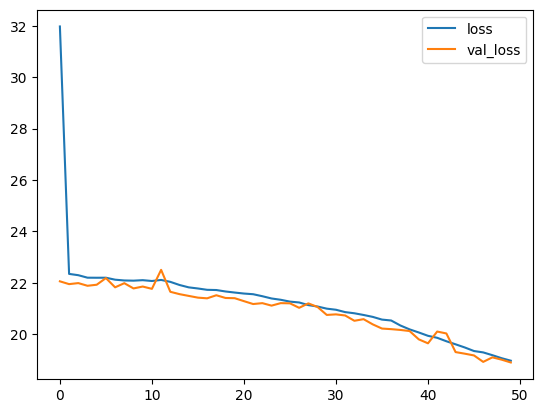

In [10]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Model Evaluation

In [11]:
# Make predictions
predictions = model.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step
Mean Absolute Error: 19.391510009765625


### Interactive Widget

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')

venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options= df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options= df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description= 'Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description= 'Select Bowler:')

predict_button = widgets.Button(description="Predict Score")


def predict_score(b):
    with output:
        clear_output()  # Clear the previous output

        # Safely read widget values and transform using the fitted encoders
        try:
            v_val = venue.value
            bt_val = batting_team.value
            bowl_t_val = bowling_team.value
            striker_val = striker.value
            bowler_val = bowler.value

            decoded_venue = venue_encoder.transform([v_val])[0]
            decoded_batting_team = batting_team_encoder.transform([bt_val])[0]
            decoded_bowling_team = bowling_team_encoder.transform([bowl_t_val])[0]
            decoded_striker = striker_encoder.transform([striker_val])[0]
            decoded_bowler = bowler_encoder.transform([bowler_val])[0]
        except Exception as e:
            print("Error encoding inputs (ensure encoders were fitted on the same label set):", e)
            return

        # Build input array in the same order used during training
        input_arr = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input_arr = input_arr.reshape(1, -1)

        try:
            input_scaled = scaler.transform(input_arr)
        except Exception as e:
            print("Error scaling input:", e)
            return

        try:
            predicted_score = model.predict(input_scaled)
            predicted_score = int(np.round(predicted_score[0, 0]))
        except Exception as e:
            print("Error during model prediction:", e)
            return

        print("Predicted score:", predicted_score)


In [13]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()